# Copula Definition

### Description
A copula is a statistical probability model that can capture the multivariate uniform distribution of two or more variables (Kenton, 2024). It can be a useful tool for identifying marginal probabilities of a pair of variables that are linked together in a multivariate system and it can be used to identify spurious correlation (Kenton, 2024).

### Application in Finance
Copulas are frequently used in derivatives pricing as well as risk and portfolio management. A specific example that can be answered with help of a copula: Given 2 investment portfolios A & B, we want to understand the probability of A losing less than $50. In order to give a good estimate, we need to understand how B behaves. Specifically, we need to specify whether B loses < $100 vs less than $1,000. Alternatively, if the loss of B is not determined, the distribution of losses of A will be evenly (uniformly) distributed. Gaussian copulas were used extensively until the 2008 financial crisis and are now known to have produced unrealistically low probability of extreme losses occuring for both variables simultaneously (Risk.net).

### Student's t Copula
Financial assets can generally be assumed to have fatter tails than a Gaussian distribution allows. A student's t distribution, generally fits financial return data better. With that student's t copulas are better at capturing tail dependencies as they allow for a higher probability of extreme joint movements (Kole et al., 2005). This makes the student's t an overall better tool for risk management and derivatives pricing.

### Code Example using Google and S&P500 Stock Data

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, norm, kendalltau

In [3]:
tickers = ["GOOG", "SPY"]
df_data = yf.download(tickers, start="2020-01-01", end="2024-01-01")["Adj Close"]
returns = df_data.pct_change().dropna()
returns.head()

[*********************100%%**********************]  2 of 2 completed


Ticker,GOOG,SPY
Date,,
2020-01-03,-0.004907,-0.007572
2020-01-06,0.024657,0.003815
2020-01-07,-0.000624,-0.002812
2020-01-08,0.007880,0.005330
2020-01-09,0.011044,0.006781


In [4]:
ecdf_GOOG = returns["GOOG"].rank() / (len(returns) + 1)
ecdf_SPY = returns["SPY"].rank() / (len(returns) + 1)
ecdf_values = np.column_stack((ecdf_GOOG, ecdf_SPY))
ecdf_values[:2]

array([[0.33697813, 0.20377734],
       [0.9055666 , 0.62723658]])

In [5]:
tau, _ = kendalltau(returns["GOOG"], returns["SPY"])
rho = np.sin(np.pi * tau / 2)

In [6]:
nu = 4  # degrees freedom
R = np.array([[1, rho], [rho, 1]])

In [7]:
def t_copula_cdf(u, nu, R):
    t_inv = t.ppf(u, df=nu)
    return t.cdf(t_inv @ np.linalg.cholesky(R).T, df=nu)


def t_copula_rvs(n, nu, R):
    d = R.shape[0]
    x = t.rvs(nu, size=(n, d))
    return t.cdf(x @ np.linalg.cholesky(R).T, df=nu)

In [8]:
sample_size = 1000
copula_samples = t_copula_rvs(sample_size, nu, R)

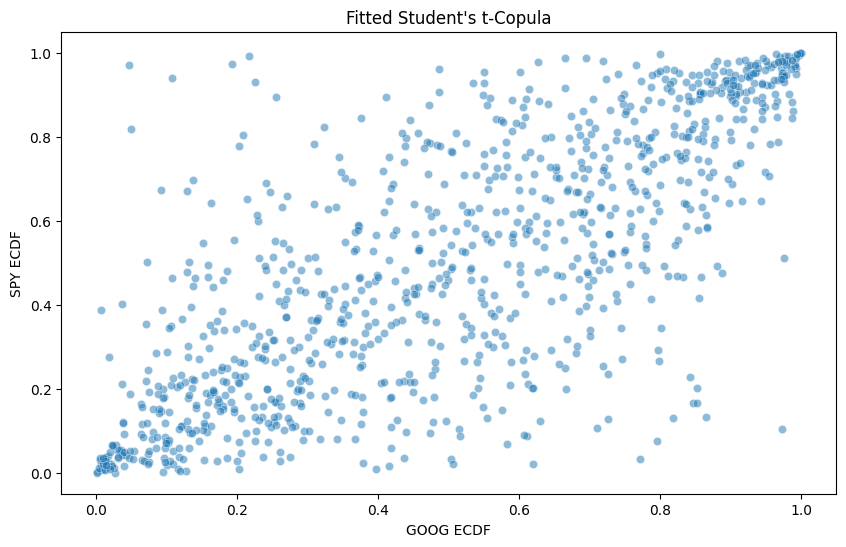

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=copula_samples[:, 0], y=copula_samples[:, 1], alpha=0.5)
plt.xlabel("GOOG ECDF")
plt.ylabel("SPY ECDF")
plt.title("Fitted Student's t-Copula")
plt.show()

## References
1. Kenton, Will. "Copula: What it Means and Examples in Advanced Financial Analysis", 11 Jan. 2024, www.investopedia.com/terms/c/copula.asp.
2. Risk Glossary - Copula, www.risk.net/definition/copula#:~:text=A%20copula%20is%20a%20cumulative,portfolio%20loses%20less%20than%20%2450.
3. Kole, Erik et all. "Testing copulas to model financial dependence.", Dept. of Financial Management, RSM Erasmus University, Rotterdam, The Netherlands, 25 May 2005. 
